## Module Five Challenge - Pymaceuticals 

For this challenge I have prepared a combination of DataFrames and plots to better understand the data. 
In the 'Summary Statistics' section of this notebook, Capomulin and Ramicane showed the lowest average tumor volumes among all treatment types.  Their small variance and standard deviation suggest a strong  correlation between these treatments and a reduced tumor size.  

Upon further analysis, Capomulin and Ramincan had the highest recorded timepoints, indicating a prolonged observations period for these treatments.  We can determine that data isn't being effected by the gender of mice, because the distribution is of mice gender is nearly 50/50. Additionally these two drugs do not have any outliers supporting the effectiveness and consistency in reducing tumor size. These finding highlight Capomulin and Ramicane as the most promising treatments. With Capomulin being the most effective - a happy outcome for Pymaceuticals!

One additional inference can be made: mouse weight may have a direct correlation with the effectiveness of Capomulin in reducing tumor size. This is supported by the correlation coefficient calculation and the linear regression model in the Line Plot section, suggesting that weight may play a role in treatment response.


In [670]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [671]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [672]:
# Combine the data into a single DataFrame

merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview

merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [673]:
# Checking the number of mice.
mouse_ID = merge_df['Mouse ID'].value_counts()
pd.DataFrame(mouse_ID)

,count
Mouse ID,
g989,13
k403,10
j365,10
j984,10
k210,10
...,...
v199,1
t573,1
f932,1


In [674]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [675]:
# Locate the rows that contain the duplicate mouse id
duplicate_index = merge_df.loc[merge_df['Mouse ID'] == 'g989', :].index
duplicate_index

Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [676]:
# Create a clean DataFrame by dropping the duplicate mouse
clean_df = merge_df.drop(duplicate_index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [677]:
# Checking the number of mice in the clean DataFrame.
print(clean_df.groupby('Mouse ID').size())


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 248, dtype: int64


## Summary Statistics

In [678]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Find the tumor volume data for each treatment
tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate the central tendency 
tumor_mean = tumor_vol.mean()
tumor_median = tumor_vol.median()
tumor_variance = tumor_vol.var()
tumor_std = tumor_vol.std()
tumor_sem = tumor_vol.sem()

# Place summary statistics of tumor volume into a DataFrame
tumor_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Standard Dev": tumor_std,
    "Sem": tumor_sem})

# Print tumor volume DataFrame
tumor_df

,Mean,Median,Variance,Standard Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [679]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single lin

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

pd.DataFrame(summary_stats)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Filter down the dataframe
filtered_data = clean_df[['Drug Regimen', 'Mouse ID', 'Timepoint']]

#Get total for each drug regimen
drug_regimen_data = filtered_data['Drug Regimen'].value_counts()

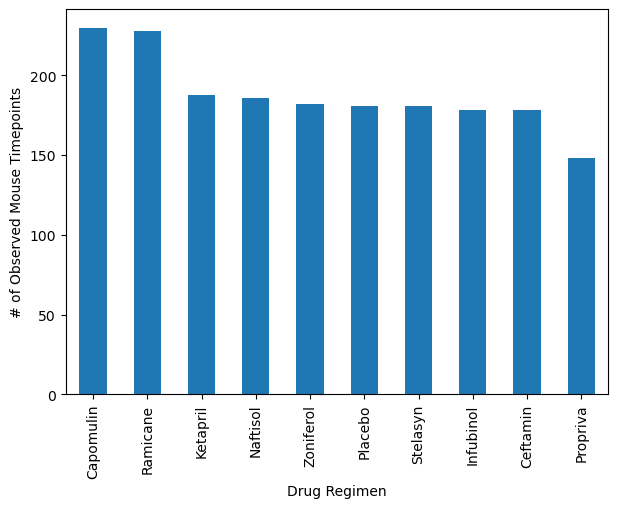

In [681]:
#Configure bar chart
drug_regimen_data.plot(kind='bar', figsize=(7,5),
                                 ylabel='# of Observed Mouse Timepoints')

plt.show()

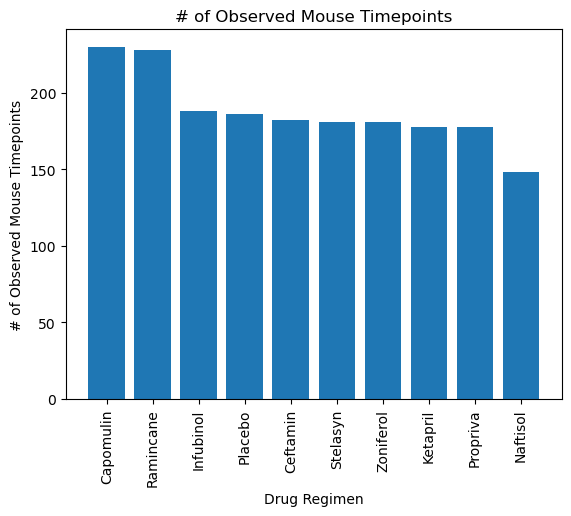

In [694]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Use .value_counts() to find the total rows for each drug
drug = filtered_data['Drug Regimen'].value_counts()

# Finding all the drug regimen names for plotting
x_axis = filtered_data['Drug Regimen'].unique()

# Plot the information
plt.bar(x_axis, drug)
plt.title('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Set tick locations and rotate labels 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramincane', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], rotation='vertical')
plt.show()

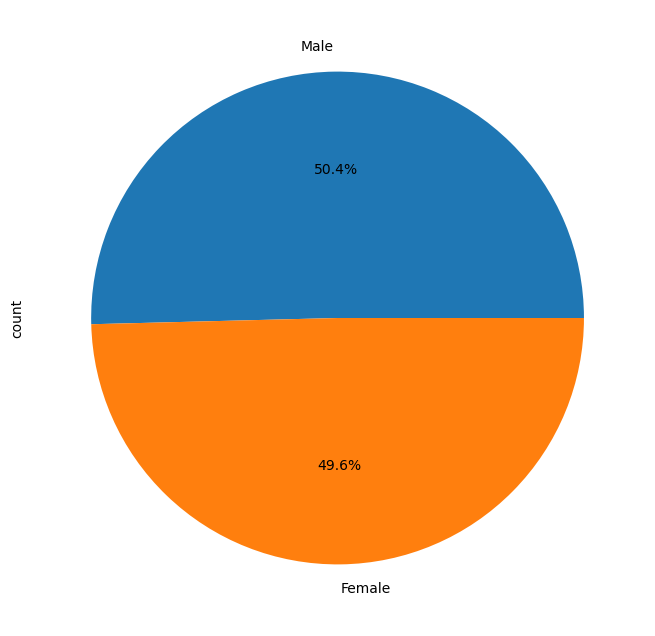

In [683]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
gender_data = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
gender_data.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.show()

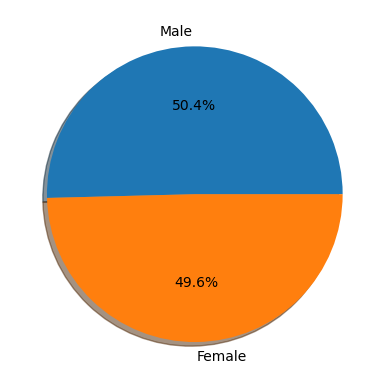

In [684]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Create label list
labels = ['Male', 'Female']

# Make the pie chart
plt.pie(gender_data, labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [685]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df.reset_index()


# # # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_dataframe = pd.merge(clean_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

In [686]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_type = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


final_tumor_vol = []

In [687]:
# loop through the treatement_type list
for type in treatment_type:

    # Extract the rows that contain the 'treatments' from the 'treatment_list' with their tumor volumes
    isolated_treatment_data = new_dataframe[new_dataframe['Drug Regimen'] == type]['Tumor Volume (mm3)']
    
    #Append the row locations to empty list
    final_tumor_vol.append(isolated_treatment_data)
    
# # #Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = isolated_treatment_data.quantile([.25, 0.5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds 
    outliers = isolated_treatment_data[(isolated_treatment_data < lower_bound) | (isolated_treatment_data > upper_bound)]
    
    # Checking if outliers exist
    if len(outliers) == 0:
        print(f"Type: {type}, Potential outliers: None")
    else:
        print(f"Type: {type}, Potential outliers: {outliers}")


Type: Capomulin, Potential outliers: None
Type: Ramicane, Potential outliers: None
Type: Infubinol, Potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Type: Ceftamin, Potential outliers: None


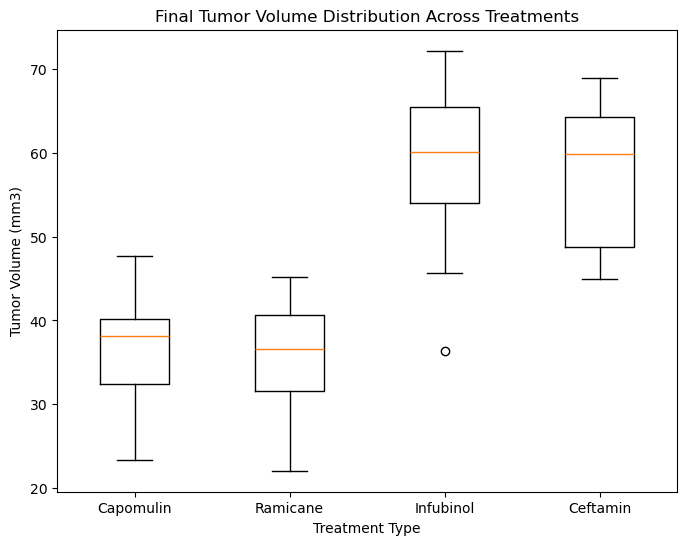

In [688]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(final_tumor_vol, labels=treatment_type)
ax.set_title('Final Tumor Volume Distribution Across Treatments')
ax.set_xlabel('Treatment Type')
ax.set_ylabel('Tumor Volume (mm3)')

# Display plot
plt.show()  

## Line Plot  

In [689]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find all the mice treated with capomulin and selecting the first one
capomulin_mice = clean_df[clean_df['Drug Regimen'] ==  'Capomulin']
capomulin_mice['Mouse ID'].unique()[0]

's185'

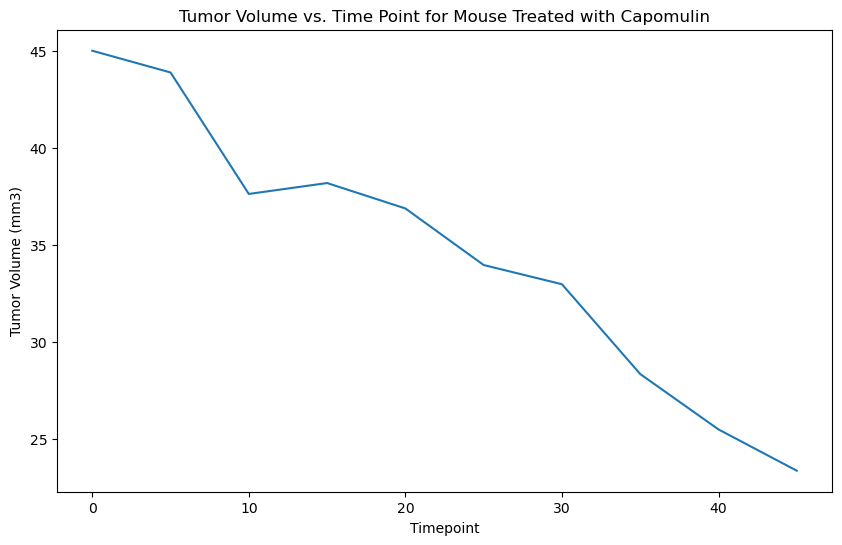

In [690]:
# Find all the data for Mouse ID 's185'
mouse_information = capomulin_mice[capomulin_mice['Mouse ID'] == 's185']

# Find the tumor volume and timepoint for mouse
tumor_vs_timepoint = mouse_information['Tumor Volume (mm3)'], mouse_information['Timepoint'].reset_index

# Plot the mouse information 
plt.figure(figsize=(10,6))
plt.plot(mouse_information['Timepoint'], mouse_information['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


# Display the plot
plt.show()

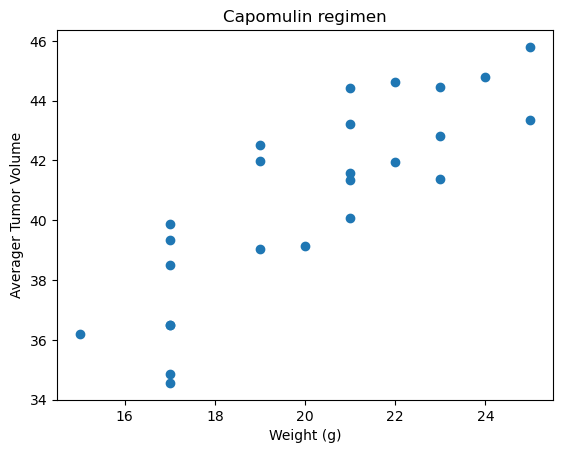

In [691]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Find all the data for capomulin
capomulin_information = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume for each mouse and merge with the mouse weight
average_cap_tumor = capomulin_information.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first') 
).reset_index()

# Generate the scatter plot
plt.scatter(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Averager Tumor Volume')
plt.title('Capomulin regimen')
plt.show()

In [692]:
#import dependency 
from scipy import stats

The correlation coefficient is 0.84


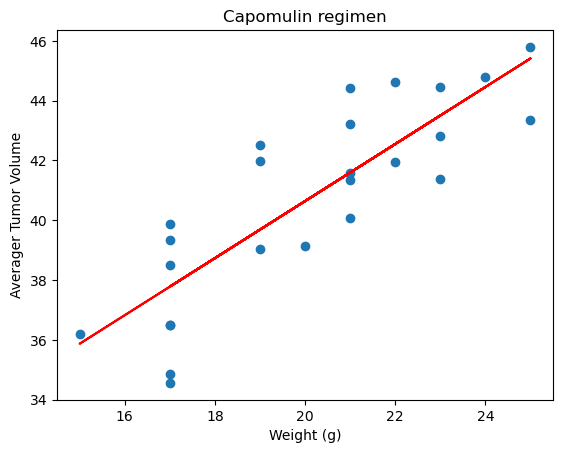

In [693]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Determine the correlation coefficient and print
print(f"The correlation coefficient is {round(st.pearsonr(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])[0],2)}")

# Create a linear regression model
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
pe_fit = pe_slope * average_cap_tumor['weight'] + pe_int

# Plot the information and line
plt.plot(average_cap_tumor['weight'],pe_fit, color='red')
plt.scatter(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Averager Tumor Volume')
plt.title('Capomulin regimen')

plt.show()